In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Aaron Judge's Statcast data
judge = pd.read_csv('datasets/judge.csv')

# Load Giancarlo Stanton's Statcast data
stanton = pd.read_csv('datasets/stanton.csv')

In [22]:
# Display all columns
pd.set_option('display.max_columns', None)

# Display the first five rows of the Aaron Judge file
judge.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,pos2_person_id,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pos1_person_id,pos2_person_id.1,pos3_person_id,pos4_person_id,pos5_person_id,pos6_person_id,pos7_person_id,pos8_person_id,pos9_person_id,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
0,FF,2017-09-30,95.7,-2.3581,5.9240,Aaron Judge,592450,608678,strikeout,swinging_strike,NaN,NaN,NaN,NaN,14.0,Aaron Judge strikes out swinging.,R,R,R,NYY,TOR,S,NaN,NaN,0,2,2017,-0.7350,1.6774,1.0150,2.5730,NaN,543305.0,NaN,1,7,Bot,NaN,NaN,NaN,NaN,431145.0,NaN,170930_192117,10.5318,-138.4377,-6.8732,-12.0431,34.6021,-9.2112,3.8271,1.6673,NaN,NaN,NaN,95.025,2270.0,6.485,492513,608678.0,431145.0,475253.0,446381.0,518626.0,572365.0,485567.0,606192.0,430832.0,54.0129,0.0,0.0,0.0,1.0,0.0,0.0,NaN,53,3
1,FF,2017-09-30,96.3,-2.5577,5.9023,Aaron Judge,592450,608678,NaN,called_strike,NaN,NaN,NaN,NaN,9.0,NaN,R,R,R,NYY,TOR,S,NaN,NaN,0,1,2017,-0.7434,1.4761,0.4546,2.3005,NaN,543305.0,NaN,1,7,Bot,NaN,NaN,NaN,NaN,431145.0,NaN,170930_192050,9.6649,-139.7614,-7.3651,-11.7176,26.7988,-11.3563,3.9923,1.8663,NaN,NaN,NaN,96.812,2252.0,6.386,492513,608678.0,431145.0,475253.0,446381.0,518626.0,572365.0,485567.0,606192.0,430832.0,54.1114,0.0,0.0,NaN,NaN,NaN,NaN,NaN,53,2
2,FF,2017-09-30,95.2,-2.3861,5.8346,Aaron Judge,592450,608678,NaN,called_strike,NaN,NaN,NaN,NaN,2.0,NaN,R,R,R,NYY,TOR,S,NaN,NaN,0,0,2017,-1.2191,1.6332,0.0957,3.4049,NaN,543305.0,NaN,1,7,Bot,NaN,NaN,NaN,NaN,431145.0,NaN,170930_192030,9.2416,-138.0840,-4.3968,-17.6628,28.7817,-10.3700,4.0395,1.8899,NaN,NaN,NaN,95.468,2291.0,6.469,492513,608678.0,431145.0,475253.0,446381.0,518626.0,572365.0,485567.0,606192.0,430832.0,54.0285,0.0,0.0,NaN,NaN,NaN,NaN,NaN,53,1
3,FT,2017-09-30,93.4,4.2502,4.6506,Aaron Judge,592450,571901,walk,ball,NaN,NaN,NaN,NaN,14.0,Aaron Judge walks. Aaron Hicks to 2nd.,R,R,L,NYY,TOR,B,NaN,NaN,3,1,2017,1.7552,0.4911,1.5161,2.8389,NaN,NaN,543305.0,1,5,Bot,NaN,NaN,NaN,NaN,431145.0,NaN,170930_183328,-10.6258,-135.1424,0.1093,23.4366,30.9796,-26.5796,4.0732,2.0215,NaN,NaN,NaN,91.825,2175.0,5.767,492513,571901.0,431145.0,475253.0,446381.0,518626.0,572365.0,485567.0,606192.0,430832.0,54.7309,0.0,0.0,0.7,1.0,0.0,0.0,NaN,36,5
4,FT,2017-09-30,92.8,4.1144,4.4696,Aaron Judge,592450,571901,NaN,called_strike,NaN,NaN,NaN,NaN,14.0,NaN,R,R,L,NYY,TOR,S,NaN,NaN,3,0,2017,1.4123,0.1889,0.0764,1.7631,NaN,NaN,543305.0,1,5,Bot,NaN,NaN,NaN,NaN,431145.0,NaN,170930_183309,-13.1954,-134.2390,-1.4760,19.6908,28.6883,-29.8328,4.1575,2.0080,NaN,NaN,NaN,91.790,2171.0,5.975,492513,571901.0,431145.0,475253.0,446381.0,518626.0,572365.0,485567.0,606192.0,430832.0,54.5228,0.0,0.0,NaN,NaN,NaN,NaN,NaN,36,4


In [23]:
# All of Aaron Judge's batted ball events in 2017
judge_events_2017 = judge[judge['game_year'] == 2017]['events']
print("Aaron Judge batted ball event totals, 2017:")
print(judge_events_2017.value_counts())

# All of Giancarlo Stanton's batted ball events in 2017
stanton_events_2017 = stanton[stanton['game_year'] == 2017]['events']
print("\nGiancarlo Stanton batted ball event totals, 2017:")
print(stanton_events_2017.value_counts())


Aaron Judge batted ball event totals, 2017:
strikeout                    207
field_out                    146
walk                         116
single                        75
home_run                      52
double                        24
grounded_into_double_play     15
force_out                     11
intent_walk                   11
hit_by_pitch                   5
field_error                    4
fielders_choice_out            4
sac_fly                        4
triple                         3
strikeout_double_play          1
Name: events, dtype: int64

Giancarlo Stanton batted ball event totals, 2017:
field_out                    239
strikeout                    161
single                        77
walk                          72
home_run                      59
double                        32
grounded_into_double_play     13
intent_walk                   13
force_out                      7
hit_by_pitch                   7
field_error                    5
sac_fly             

Text(0.5, 1.0, 'Giancarlo Stanton\nHome Runs, 2015-2017')

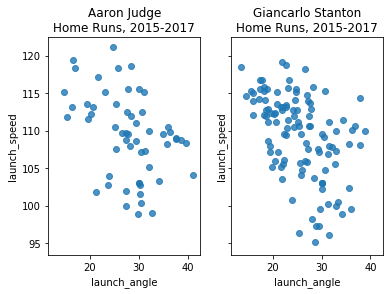

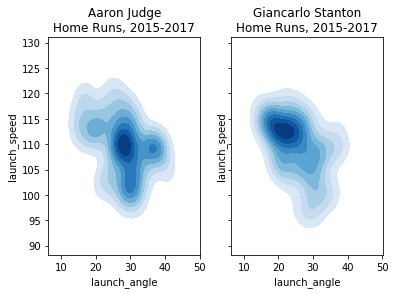

In [24]:
# Filter to include home runs only
judge_hr = judge[judge['events']=='home_run']
stanton_hr = stanton[stanton['events']=='home_run']

# Create a figure with two scatter plots of launch speed vs. launch angle, one for each player's home runs
fig1, axs1 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.regplot(x='launch_angle', y='launch_speed', fit_reg=False, color='tab:blue', data=judge_hr, ax=axs1[0]).set_title('Aaron Judge\nHome Runs, 2015-2017')
sns.regplot(x='launch_angle', y='launch_speed', fit_reg=False, color='tab:blue', data=stanton_hr, ax=axs1[1]).set_title('Giancarlo Stanton\nHome Runs, 2015-2017')

# Create a figure with two KDE plots of launch speed vs. launch angle, one for each player's home runs
fig2, axs2 = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.kdeplot(judge_hr['launch_angle'], judge_hr['launch_speed'], cmap="Blues", shade=True, shade_lowest=False, ax=axs2[0]).set_title('Aaron Judge\nHome Runs, 2015-2017')
sns.kdeplot(stanton_hr['launch_angle'], stanton_hr['launch_speed'], cmap="Blues", shade=True, shade_lowest=False, ax=axs2[1]).set_title('Giancarlo Stanton\nHome Runs, 2015-2017')

Text(0.5, 1.0, 'Home Runs, 2015-2017')

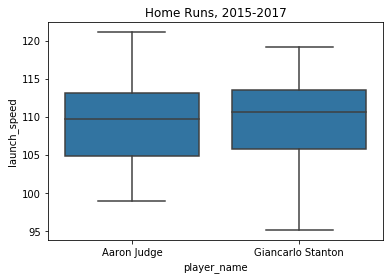

In [25]:
# Combine the Judge and Stanton home run DataFrames for easy boxplot plotting
judge_stanton_hr = pd.concat([judge_hr,stanton_hr])

# Create a boxplot that describes the pitch velocity of each player's home runs
sns.boxplot(x='player_name',y='launch_speed',data=judge_stanton_hr,color='tab:blue').set_title('Home Runs, 2015-2017')


In [26]:
def assign_x_coord(row):
    """
    Assigns an x-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored for plotting simplicity.
    """
    # Left third of strike zone
    if row.zone in [1, 4, 7]:
        return 1
    # Middle third of strike zone
    if row.zone in [2, 5, 8]:
        return 2
    # Right third of strike zone
    if row.zone in [3, 6, 9]:
        return 3

In [27]:
def assign_y_coord(row):
    """
    Assigns a y-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored for plotting simplicity.
    """
    # Upper third of strike zone
    if row.zone in [1, 2, 3]:
        return 3
    # Middle third of strike zone
    if row.zone in [4, 5, 6]:
        return 2
    if row.zone in [7, 8, 9]:
    # ... YOUR CODE FOR TASK 7 ...
        return 1

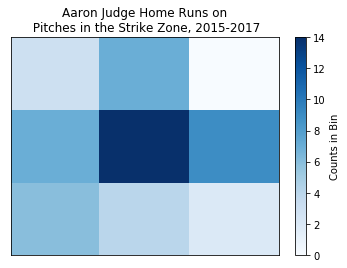

In [28]:
# Zones 11, 12, 13, and 14 are to be ignored for plotting simplicity
judge_strike_hr = judge_hr.copy().loc[judge_hr.zone <= 9]

# Assign Cartesian coordinates to pitches in the strike zone for Judge home runs
judge_strike_hr['zone_x'] = judge_strike_hr.apply(assign_x_coord, axis=1)
judge_strike_hr['zone_y'] = judge_strike_hr.apply(assign_y_coord, axis=1)

# Plot Judge's home run zone as a 2D histogram with a colorbar
plt.hist2d(judge_strike_hr['zone_x'],judge_strike_hr['zone_y'], bins = 3, cmap='Blues') 
plt.title('Aaron Judge Home Runs on\n Pitches in the Strike Zone, 2015-2017')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')

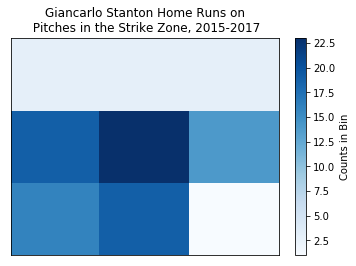

In [29]:
# Zones 11, 12, 13, and 14 are to be ignored for plotting simplicity
stanton_strike_hr = stanton_hr.copy().loc[stanton_hr.zone <= 9]

# Assign Cartesian coordinates to pitches in the strike zone for Stanton home runs
stanton_strike_hr['zone_x'] = stanton_strike_hr.apply(assign_x_coord, axis=1)
stanton_strike_hr['zone_y'] = stanton_strike_hr.apply(assign_y_coord, axis=1)
# Plot Stanton's home run zone as a 2D histogram with a colorbar
plt.hist2d(stanton_strike_hr['zone_x'],stanton_strike_hr['zone_y'], bins = 3, cmap='Blues')
plt.title('Giancarlo Stanton Home Runs on\n Pitches in the Strike Zone, 2015-2017')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
cb = plt.colorbar()
cb.set_label('Counts in Bin')